Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-3625077272.py:44: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax1.set_ylim(0, 60000)
/tmp/ipython-input-3625077272.py:68: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax2.set_ylim(0, 70000)


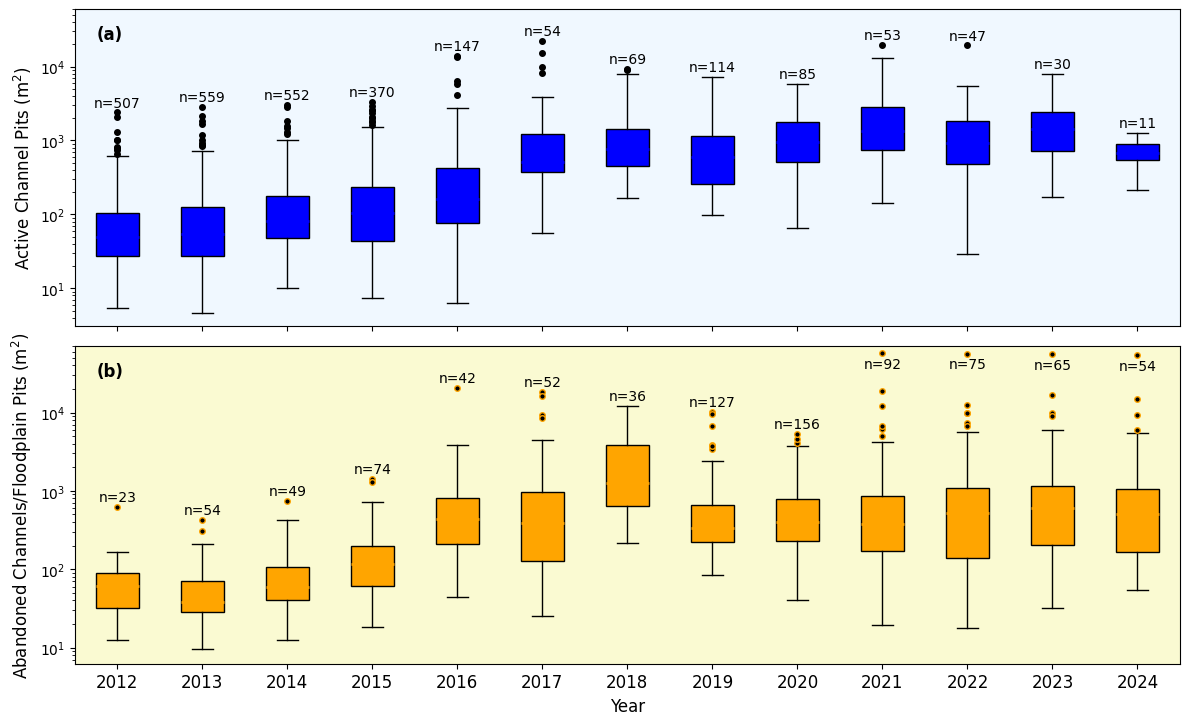

Figure saved successfully at /content/drive/My Drive/colab/fig8_whisker/fig8_whisker.png


In [5]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Install necessary libraries
!pip install pandas matplotlib openpyxl

# Step 3: Import the libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 4: Load the Excel file from the new folder and file path
file_path = '/content/drive/My Drive/colab/fig8_whisker/plot_whisker.xlsx'  # Update this with the actual path

# Load the sheets for both 'channels' and 'fp'
channels_df = pd.read_excel(file_path, sheet_name='channels')
fp_df = pd.read_excel(file_path, sheet_name='fp')

# Step 5: Select the relevant columns for the years 2012 to 2024 for both channels and floodplain pits
channels_columns = [f'area_c_{year} (sqm)' for year in range(2012, 2025)]
fp_columns = [f'area_fp_{year} (sqm)' for year in range(2012, 2025)]

channels_data = channels_df[channels_columns]
fp_data = fp_df[fp_columns]

# Step 6: Rename the columns for simplicity
channels_data.columns = [str(year) for year in range(2012, 2025)]
fp_data.columns = [str(year) for year in range(2012, 2025)]

# Step 7: Create subplots for both box plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Convert each year's data to a list to ensure proper plotting
channels_list = [channels_data[str(year)].dropna().tolist() for year in range(2012, 2025)]
fp_list = [fp_data[str(year)].dropna().tolist() for year in range(2012, 2025)]

# Top subplot for Channel Areas
#box1 = ax1.boxplot(channels_list, whis=7, patch_artist=True, widths=0.5)
box1 = ax1.boxplot(
    channels_list, whis=7, patch_artist=True, widths=0.5,
    medianprops=dict(color='red', linewidth=2)
)
ax1.set_yscale('log')
ax1.set_ylim(0, 60000)
ax1.set_ylabel(r'Active Channel Pits (m$^2$)', fontsize=12)

# Set box and whisker colors
for box in box1['boxes']:
    box.set_facecolor('blue')  # Keep the box color as blue
for whisker, cap in zip(box1['whiskers'], box1['caps']):
    whisker.set_color('black')
    cap.set_color('black')
for flier in box1['fliers']:
    flier.set(markerfacecolor='black', markeredgecolor='black', markersize=4)  # Outliers set to black with smaller size
for median in box1['medians']:
    median.set_color('blue')

# Set a soft background color
ax1.set_facecolor('#f0f8ff')  # Light blue for the top plot background

# Bottom subplot for Floodplain Areas
#box2 = ax2.boxplot(fp_list, whis=5.5, patch_artist=True, widths=0.5)
box2 = ax2.boxplot(
    fp_list, whis=5.5, patch_artist=True, widths=0.5,
    medianprops=dict(color='red', linewidth=2)
)
ax2.set_yscale('log')
ax2.set_ylim(0, 70000)
ax2.set_ylabel('Abandoned Channels/Floodplain Pits (m$^2$)', fontsize=12)

# Set box and whisker colors
for box in box2['boxes']:
    box.set_facecolor('orange')  # Keep the box color as orange
for whisker, cap in zip(box2['whiskers'], box2['caps']):
    whisker.set_color('black')
    cap.set_color('black')
for flier in box2['fliers']:
    flier.set(markerfacecolor='black', markeredgecolor='orange', markersize=4)  # Outliers set to black with smaller size
for median in box2['medians']:
    median.set_color('orange')

# Set a soft background color
ax2.set_facecolor('#fafad2')  # Light goldenrod yellow for the bottom plot background

# Set x-tick labels for years on the second (bottom) plot
year_labels = [str(year) for year in range(2012, 2025)]
ax2.set_xticks(range(1, len(year_labels) + 1))
ax2.set_xticklabels(year_labels, fontsize=12)

# Add counts for each year above the outliers
channels_counts = [len(channels_data[str(year)].dropna()) for year in range(2012, 2025)]
fp_counts = [len(fp_data[str(year)].dropna()) for year in range(2012, 2025)]

# Annotate the top plot (Channels) with counts
for i, n_channels in enumerate(channels_counts):
    max_y = max(channels_list[i]) if len(channels_list[i]) > 0 else 0  # Find max value in channels list
    ax1.text(i + 1, max_y * 1.20, f'n={n_channels}', ha='center', fontsize=10, color='black')  # Adjust above the max value

# Annotate the bottom plot (Floodplain) with counts
fp_position_multipliers = [1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 0.65, 0.65, 0.65, 0.65]  # Example values for each year

for i, (n_fp, multiplier) in enumerate(zip(fp_counts, fp_position_multipliers)):
    max_y = max(fp_list[i]) if len(fp_list[i]) > 0 else 0  # Find max value in fp list
    ax2.text(i + 1, max_y * multiplier, f'n={n_fp}', ha='center', fontsize=10, color='black')  # Adjust based on custom multiplier

# Label the top plot as (a) and the bottom plot as (b) using subplot coordinates
ax1.text(0.02, 0.95, '(a)', ha='left', va='top', fontsize=12, weight='bold', transform=ax1.transAxes)
ax2.text(0.02, 0.95, '(b)', ha='left', va='top', fontsize=12, weight='bold', transform=ax2.transAxes)


# Add a single title for the entire figure and a single x-axis label
plt.xlabel('Year', fontsize=12)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust top space for the suptitle

# Define the file path to save the plot
output_file_path = '/content/drive/My Drive/colab/fig8_whisker/fig8_whisker.png'

# Save the figure in high resolution (300 DPI)
fig.savefig(output_file_path, dpi=600, bbox_inches='tight', format='png')

# Display the combined plot
plt.show()

print(f"Figure saved successfully at {output_file_path}")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


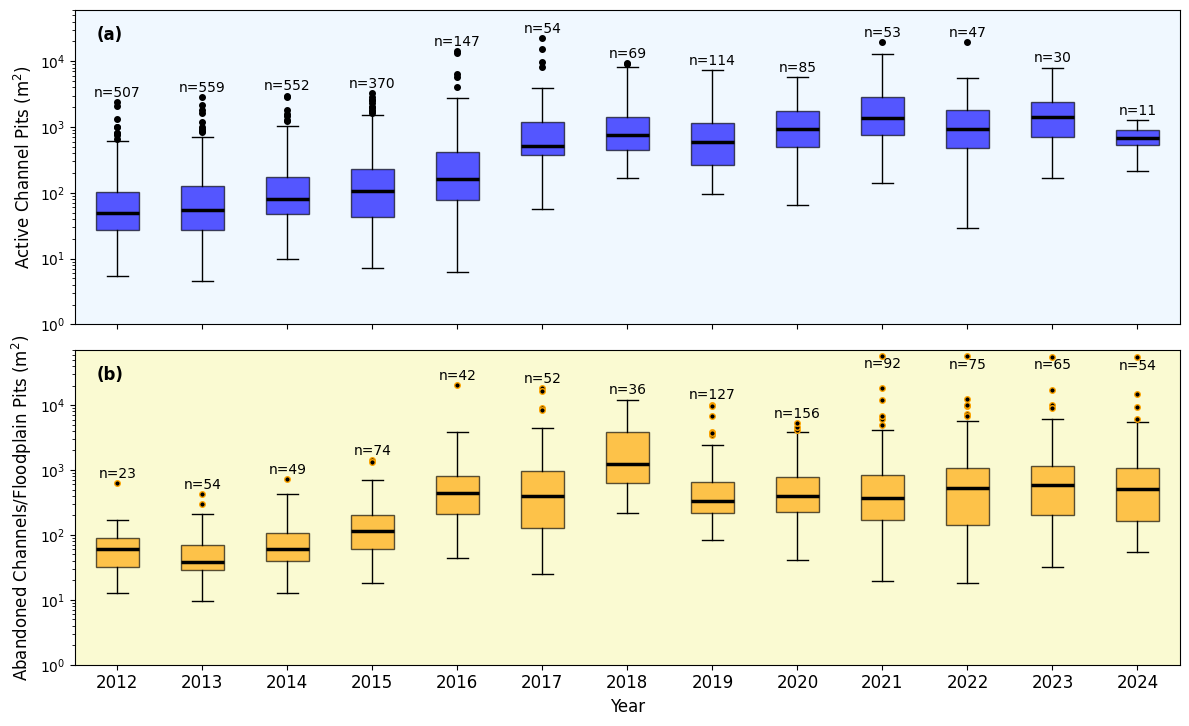

Figure saved successfully at /content/drive/My Drive/colab/fig8_whisker/fig8_whisker.png


In [7]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Install necessary libraries
!pip install pandas matplotlib openpyxl

# Step 3: Import the libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 4: Load the Excel file
file_path = '/content/drive/My Drive/colab/fig8_whisker/plot_whisker.xlsx'

# Load sheets
channels_df = pd.read_excel(file_path, sheet_name='channels')
fp_df = pd.read_excel(file_path, sheet_name='fp')

# Step 5: Select columns (2012–2024)
channels_columns = [f'area_c_{year} (sqm)' for year in range(2012, 2025)]
fp_columns       = [f'area_fp_{year} (sqm)' for year in range(2012, 2025)]

channels_data = channels_df[channels_columns].copy()
fp_data       = fp_df[fp_columns].copy()

# Step 6: Rename columns
years = [str(y) for y in range(2012, 2025)]
channels_data.columns = years
fp_data.columns = years

# Step 7: Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Lists per year
channels_list = [channels_data[y].dropna().tolist() for y in years]
fp_list       = [fp_data[y].dropna().tolist() for y in years]

# Top subplot for Channel Areas (median clearly visible)
box1 = ax1.boxplot(
    channels_list, whis=7, patch_artist=True, widths=0.5,
    medianprops=dict(color='black', linewidth=2.5, zorder=3)
)
ax1.set_yscale('log')
ax1.set_ylim(1, 60000)
ax1.set_ylabel(r'Active Channel Pits (m$^2$)', fontsize=12)

# Color styling
for b in box1['boxes']:
    b.set_facecolor('blue')
    b.set_alpha(0.65)
for w, c in zip(box1['whiskers'], box1['caps']):
    w.set_color('black'); c.set_color('black')
for f in box1['fliers']:
    f.set(markerfacecolor='black', markeredgecolor='black', markersize=4)

ax1.set_facecolor('#f0f8ff')

# Bottom subplot for Floodplain Areas (median clearly visible)
box2 = ax2.boxplot(
    fp_list, whis=5.5, patch_artist=True, widths=0.5,
    medianprops=dict(color='black', linewidth=2.5, zorder=3)
)
ax2.set_yscale('log')
ax2.set_ylim(1, 70000)
ax2.set_ylabel('Abandoned Channels/Floodplain Pits (m$^2$)', fontsize=12)

for b in box2['boxes']:
    b.set_facecolor('orange')
    b.set_alpha(0.65)
for w, c in zip(box2['whiskers'], box2['caps']):
    w.set_color('black'); c.set_color('black')
for f in box2['fliers']:
    f.set(markerfacecolor='black', markeredgecolor='orange', markersize=4)

ax2.set_facecolor('#fafad2')

# X ticks
ax2.set_xticks(range(1, len(years) + 1))
ax2.set_xticklabels(years, fontsize=12)

# Counts
channels_counts = [len(channels_data[y].dropna()) for y in years]
fp_counts       = [len(fp_data[y].dropna()) for y in years]

for i, n_channels in enumerate(channels_counts):
    max_y = max(channels_list[i]) if channels_list[i] else 1
    ax1.text(i + 1, max_y * 1.20, f'n={n_channels}', ha='center', fontsize=10, color='black')

fp_position_multipliers = [1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 0.65, 0.65, 0.65, 0.65]
for i, (n_fp, mult) in enumerate(zip(fp_counts, fp_position_multipliers)):
    max_y = max(fp_list[i]) if fp_list[i] else 1
    ax2.text(i + 1, max_y * mult, f'n={n_fp}', ha='center', fontsize=10, color='black')

# Panel labels
ax1.text(0.02, 0.95, '(a)', ha='left', va='top', fontsize=12, weight='bold', transform=ax1.transAxes)
ax2.text(0.02, 0.95, '(b)', ha='left', va='top', fontsize=12, weight='bold', transform=ax2.transAxes)

# Final layout and save
plt.xlabel('Year', fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

output_file_path = '/content/drive/My Drive/colab/fig8_whisker/fig8_whisker.png'
fig.savefig(output_file_path, dpi=600, bbox_inches='tight', format='png')
plt.show()

print(f"Figure saved successfully at {output_file_path}")
